#  Appendix A : Inverse limit computation

In this jupyter notebook we directly compute the inverse limit given in Appendix A of the PhD thesis: *Matroids, Flag Varieties, and Generalized Permutahedra*.

In [224]:
using Oscar

**Functions**

``ind_2_set`` returns set corresponding to an indicator vector.

``symm_diff`` returns symmetric difference of two sets.

``matroid_matrix`` returns a $d\times n$ matrix which we may use to compute the associated ideal, semigroup, and ambient ring of the coordinate ring of its matroid stratum.

In [232]:
function ind_2_set(e)
    
    return [i for i in 1:length(e) if !(e[i]==0)]
end

function symm_diff(A,B)
    
    return setdiff(union(A,B),intersect(A,B))
    
end

function matroid_matrix(M,F)
    
    Bs = bases(M)
    
    d = rank(M)
    
    dd = [i for i in 1:d]
    
    @req dd in Bs "matroid not standardized, d is not a basis"

    n = length(M)
    
    P,x = polynomial_ring(F, :x=>(1:d,1:n-d))
    
    X = hcat(identity_matrix(P,d),matrix(P,x))
    
    
    for i in 1:d, j in d+1:n
        
        if setdiff(union(setdiff(dd,i),j)) in Bs
            
            X[i,j] = X[i,j]
            
            
        else
            
            X[i,j] = 0
            
        end

        
    end
    
    return X
end

matroid_matrix (generic function with 1 method)

**1. Compute matroid subdivision of $\Delta(2,4)$.**

In [235]:
H24 = hypersimplex(2,4)
V24 = vertices(H24)

6-element SubObjectIterator{PointVector{QQFieldElem}}:
 [1, 1, 0, 0]
 [1, 0, 1, 0]
 [1, 0, 0, 1]
 [0, 1, 1, 0]
 [0, 1, 0, 1]
 [0, 0, 1, 1]

In [236]:
w = [0,1,0,0,0,0];
Sw = subdivision_of_points(H24,w)

Subdivision of points in ambient dimension 4

Observe that the subdivision $Sw$ is a split of $\Delta(2,4)$. We visualize $Sw$. 

Recall $\Delta(2,4)$ is isomorphic to the octahedron.

We visualize the subdivision below.

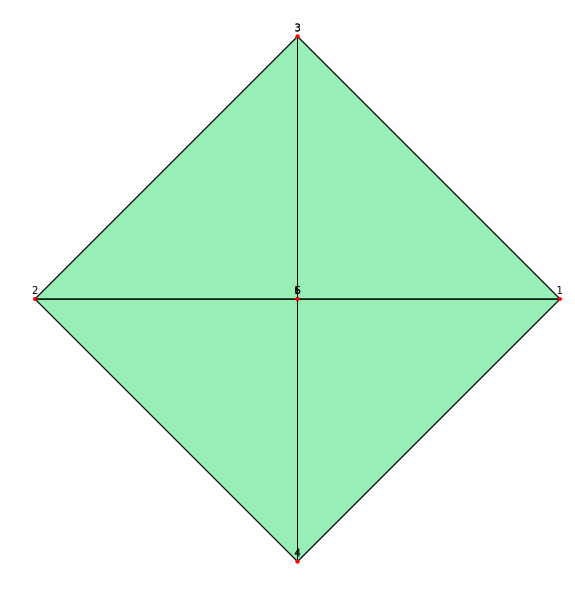

In [345]:
O = platonic_solid("octahedron")
So = subdivision_of_points(O,w)
visualize(So)

**2. Obtain matroids from cells of subdivision**

In [348]:
Ms = maximal_cells(Sw)

2-element SubObjectIterator{Vector{Int64}}:
 [1, 2, 3, 4, 6]
 [1, 3, 4, 5, 6]

In [349]:
E1 = [V24[i] for i in Ms[1]]

5-element Vector{PointVector{QQFieldElem}}:
 [1, 1, 0, 0]
 [1, 0, 1, 0]
 [1, 0, 0, 1]
 [0, 1, 1, 0]
 [0, 0, 1, 1]

In [350]:
E2 = [V24[i] for i in Ms[2]]

5-element Vector{PointVector{QQFieldElem}}:
 [1, 1, 0, 0]
 [1, 0, 0, 1]
 [0, 1, 1, 0]
 [0, 1, 0, 1]
 [0, 0, 1, 1]

In [351]:
E12 = [V24[i] for i in intersect(Ms[1],Ms[2])]

4-element Vector{PointVector{QQFieldElem}}:
 [1, 1, 0, 0]
 [1, 0, 0, 1]
 [0, 1, 1, 0]
 [0, 0, 1, 1]

In [352]:
B1 = [ind_2_set(e) for e in E1]
Q1 = matroid_from_bases(B1,4)

B2 = [ind_2_set(e) for e in E2]
Q2 = matroid_from_bases(B2,4)

B12 = [ind_2_set(e) for e in E12]
Q12 = matroid_from_bases(B12,4)

Matroid of rank 2 on 4 elements

**Obtain coordinate ring data**

Compute data corresponding to maximal cell $\Delta(Q_1)$.

In [353]:
X1 = matroid_matrix(Q1,QQ)

[1   0   x[1, 1]         0]
[0   1   x[2, 1]   x[2, 2]]

In [354]:
I1 = ideal([det(X1[:,b]) for b in nonbases(Q1)])

Ideal generated by
  0

In [355]:
U1 = [det(X1[:,b]) for b in bases(Q1)]

5-element Vector{QQMPolyRingElem}:
 1
 x[2, 1]
 x[2, 2]
 -x[1, 1]
 x[1, 1]*x[2, 2]

Then we have $\mathbb{C}[\text{Gr}(Q_1,\mathbb{C})]\cong\frac{U^{-1}_{1}\mathbb{C}[x_{1,1},x_{2,1},x_{2,2}]}{\langle0\rangle}\cong\mathbb{C}[x^{\pm}_{1,1},x^{\pm}_{2,1},x^{\pm}_{2,2}]$.

Compute data corresponding to maximal cell $\Delta(Q_2)$.

In [356]:
X2 = matroid_matrix(Q2,QQ)

[1   0   x[1, 1]   x[1, 2]]
[0   1         0   x[2, 2]]

In [357]:
I2 = ideal([det(X2[:,b]) for b in nonbases(Q2)])

Ideal generated by
  0

In [358]:
U2 = [det(X2[:,b]) for b in bases(Q2)]

5-element Vector{QQMPolyRingElem}:
 1
 x[2, 2]
 -x[1, 1]
 -x[1, 2]
 x[1, 1]*x[2, 2]

Similar to the above, we have $\mathbb{C}[\text{Gr}(Q_2,\mathbb{C})]\cong \mathbb{C}[x^{\pm}_{1,1},x^{\pm}_{1,2},x^{\pm}_{2,2}]$.

Compute data corresponding to common face of $\Delta(Q_{1})$ and $\Delta(Q_{2})$.

In [362]:
X12 = matroid_matrix(Q12,QQ)

[1   0   x[1, 1]         0]
[0   1         0   x[2, 2]]

In [363]:
I12 = ideal(unique([det(X12[:,b]) for b in nonbases(Q12)]))

Ideal generated by
  0

In [364]:
U12 = [det(X12[:,b]) for b in bases(Q12)]

4-element Vector{QQMPolyRingElem}:
 1
 x[2, 2]
 -x[1, 1]
 x[1, 1]*x[2, 2]

Then we have $\mathbb{C}[\text{Gr}(Q_{12},\mathbb{C})\cong\mathbb{C}[x^{\pm}_{1,1},x^{\pm}_{2,2}]$.

One may then compute the inverse limit $\text{Gr}(w)$ directly, noting that in this case $\text{Gr}(w)$ is isomorphic to the fiber product. $\text{Gr}(w)\cong \text{Gr}(Q_{1},\mathbb{C})\times_{\text{Gr}(Q_{12};\mathbb{C})}\text{Gr}(Q_{2};\mathbb{C})$. Then it follows that $\mathbb{C}[\text{Gr}(w)]\cong\mathbb{C}[x^{\pm}_{1,1},x^{\pm}_{1,2},x^{\pm}_{2,1},x^{\pm}_{2,2}]$. Since $\text{Gr}(w)$ is smooth, irreducible, and $4$-dimensional, we have $\text{in}_{w}\text{Gr}^{\circ}(2,4)\cong\text{Gr}(w)$ by Corollary 5.2.2.

**Apply Proposition 5.3.6**

We add a demonstration of a Proposition in the paper, which is not used in Appendix A.

Cleary, the tightspan $\Sigma$ of the subdivision induced by $w$ satisfies the hypotheses of Proposition 5.3.6, which gives us a striaghtforward formula for the coordinate ring of the inverse limit.

The input data is:

1. $B_{\Sigma} = \mathbb{C}[x_{i,j}:[2]\Delta\{i,j+2\}\in \mathcal{B}(Q) \text{for some maximal } \Delta(Q)]$.

2. $I_{\Sigma}=\sum I_{Q}B_{\Sigma}$ where the sum is over all maximal cells $\Delta(Q)$ of the subdivision.

3. $S_{\Sigma}=\langle S_{Q}:\Delta(Q)\text{ is a maximal cell}\rangle_{\text{semigrp}}$.

Then $\mathbb{C}[\text{Gr}(w)]\cong\frac{S^{-1}_{\Sigma}B_{\Sigma}}{I_{\Sigma}}$.

1.Obtain $B_{\Sigma}$. Since we are computing over $\text{TS}(w)$, this will just be $\mathbb{C}[x_{11},x_{12},x_{21},x_{22}]$.

In [370]:
T = [x[i,j] for i in 1:2, j in 1:2 if symm_diff([1,2],[i,j+2]) in union(B1,B2)]#Compute relevant variables.

4-element Vector{QQMPolyRingElem}:
 x[1, 1]
 x[2, 1]
 x[1, 2]
 x[2, 2]

In [374]:
B = parent(gens(I1)[1])

Multivariate polynomial ring in 4 variables x[1, 1], x[2, 1], x[1, 2], x[2, 2]
  over rational field

Clearly $I_{\Sigma}$ is trivial.

In [375]:
I = I1 + I2 + I12

Ideal with 0 generators

Compute semigroup $S_{\Sigma}$.

In [368]:
S = reduce(union,[U1,U2])

6-element Vector{QQMPolyRingElem}:
 1
 x[2, 1]
 x[2, 2]
 -x[1, 1]
 x[1, 1]*x[2, 2]
 -x[1, 2]

In [391]:
L = reduce(product,powers_of_element.(T))

Multiplicative subset
  of multivariate polynomial ring in 4 variables over QQ
  given by the products of [x[1, 1], x[2, 1], x[1, 2], x[2, 2]]

In [392]:
L == S

true

In [388]:
S = reduce(product,powers_of_element.(S))

Multiplicative subset
  of multivariate polynomial ring in 4 variables over QQ
  given by the products of [x[2, 1], x[1, 1]*x[2, 2], -x[1, 2]]

In [386]:
product(U1,U2)

LoadError: MethodError: no method matching product(::Vector{QQMPolyRingElem}, ::Vector{QQMPolyRingElem})
You may have intended to import Base.product

In [378]:
Inv = affine_scheme(P,I,Z)

Spectrum
  of localization
    of quotient
      of multivariate polynomial ring in 4 variables x[1, 1], x[2, 1], x[1, 2], x[2, 2]
        over rational field
      by ideal ()
    at products of (x[2, 1], x[1, 1]*x[2, 2], -x[1, 2])

We can see $\text{Spec}(\text{Inv})$ is smooth and irreducible. We verify the dimension below.

In [334]:
dim(Inv)

4